Згенегуємо два набори значень $x$ і $y$.

In [82]:
import numpy as np

x = np.random.uniform(0, 100, 100)
y = 2 * x + 1 + np.random.randint(0, 25, 100)

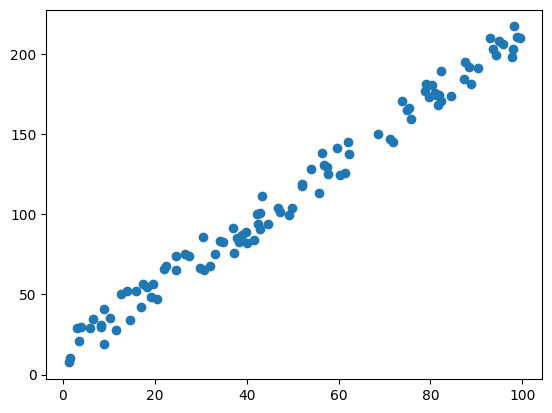

In [83]:
from matplotlib import pyplot as plt

plt.scatter(x, y)

### Завдання.

Знайти значення коефіцієнтів рівняння лінійної регресії $\beta_0$ та $\beta_1$:

1) за допомогою формул з підручника;

2) за допомогою моделі sklearn.linear_model.LinearRegression;

3) знайти передбачення для значення змінної $x$, що рівне 120. 

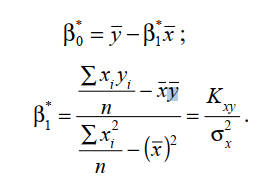

1) за допомогою формул з підручника:

In [84]:
def regression_coeffs(x, y):
    beta_1 = np.cov(x, y)[0][1] / np.var(x)
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    return beta_0, beta_1

In [85]:
beta_0, beta_1 = regression_coeffs(x, y)

print(f"y = {beta_1} * x + {beta_0}")

y = 2.0016666520222044 * x + 12.97757078427719


In [86]:
F = np.column_stack((np.ones_like(x), x))
A = F.transpose() @ F
betas = np.linalg.inv(A) @ F.transpose() @ y.reshape(-1, 1)
print(f"y = {betas[1][0]} * x + {betas[0][0]}")

y = 1.9816499855019867 * x + 13.967554356531409


2) за допомогою моделі sklearn.linear_model.LinearRegression:

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=5
)

mdl = LinearRegression(fit_intercept=True)

mdl = mdl.fit(x_train, y_train)

print(f"y = {mdl.coef_[0]} * x + {mdl.intercept_}")

y = 1.9901731795257664 * x + 13.943966251565556


In [89]:
from sklearn.metrics import mean_squared_error

model_forecast = mdl.predict(x_test)

print('Помилка прогнозу з використанням моделі: ', mean_squared_error(y_test, model_forecast))

Помилка прогнозу з використанням моделі:  78.70235935377292


In [90]:
y_train_forecast = mdl.predict(x_train)

print('Помилка на навчальних даних: ', mean_squared_error(y_train, y_train_forecast))
print('Помилка тестових даних: ', mean_squared_error(y_test, model_forecast))

Помилка на навчальних даних:  47.52709082879206
Помилка тестових даних:  78.70235935377292


3) знайти передбачення для змінної $x = 120$:

In [91]:
a = np.array([120]).reshape(-1, 1)

model_forecast_a = mdl.predict(a)

for i in range(len(model_forecast_a)):
    print(f"x = {a[i][0]}: y = {model_forecast_a[i]}")

x = 120: y = 252.76474779465752


Використаємо результати пункту 1) для передбачення:

In [94]:
prediction_1 = beta_1 * 120 + beta_0
prediction_2 = betas[1][0] * 120 + betas[0][0]

print(f"1) x = 120: y = {prediction_1}")
print(f"2) x = 120: y = {prediction_2}")

1) x = 120: y = 253.1775690269417
2) x = 120: y = 251.7655526167698
